## LogisticRegression
```
LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='warn',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
)
```
### 处理非平衡数据
class_weight  
class_weight='balanced'

In [4]:
!pip freeze | grep scikit-learn

scikit-learn==0.21.3


In [1]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression(class_weight='balanced')

In [ ]:
LogisticRegression(class_weight={0:1,1:100})  # 标签0的权重是1， 标签1的权重是100

# LR手写实现
https://www.bilibili.com/video/av9912938/?p=34

初始问题：现在有一批数据，如下：  
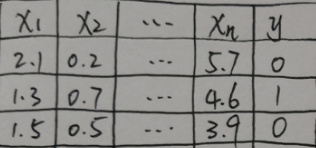

目的：希望用x来拟合y，求解最优参数W,b

In [ ]:
显然，直接使用线性回归WX+b是不行的，因为其值域为-∞,+∞， 那么就把其值域压到0,1;  
引入中间变量Z，令sigmoid(Z) = P(y=1)， 则 P(y=0)=1-P(y=1)

注：P(y=1)表示y=1的概率

## 求解：最大似然估计  
使得目前情况出现的可能性最大

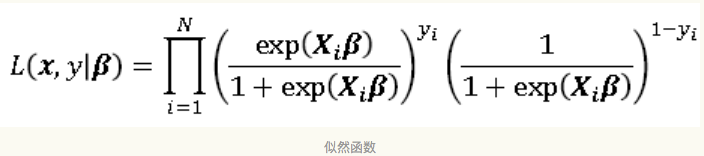

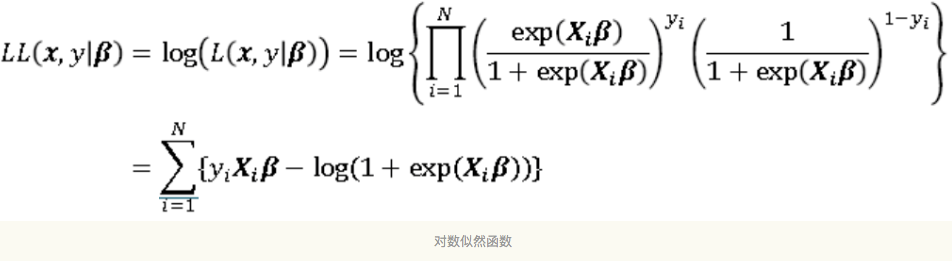

## 梯度上升法
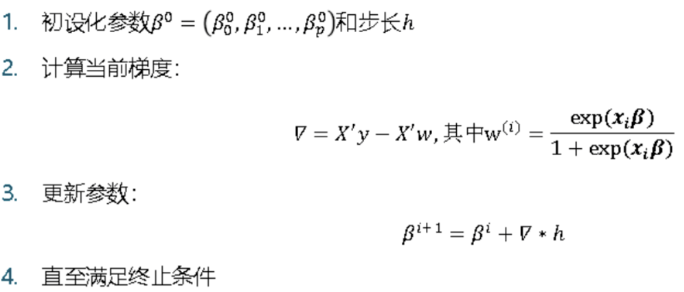

In [4]:
import numpy as np

In [2]:
def sigmoid_function(z):
    """
    sigmoid function or logistic function is used as a hypothesis function in classification problems
    """
    return 1 / (1 + np.exp(-z))

In [3]:
def cost_function(h, y):
    """
    逻辑回归专用代价函数
    """
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [5]:
loss = np.inf

In [6]:
loss - 4

inf

In [25]:
def logistic_reg(
    X,
    y,fit_intercept=True,
    lr=0.01, tol=1e-7, max_iter=1e7
    ):
    """
    X is the feature matrix,
    y is the target matrix
    lr is the learning rate, 
    tol: tolerance
    """
    if fit_intercept:
        X = np.c_[np.ones(X.shape[0]), X]
    converged = False  # 收敛
    iterations = 0
    theta = np.zeros(X.shape[1])  # step1: 初始化参数向量
    loss = np.inf
    while not converged:
        z = np.dot(X, theta)
        h = sigmoid_function(z)
        # step2: 计算梯度
        gradient = np.dot(X.T, h - y) / y.size
        # step3: 更新参数
        theta = theta - lr * gradient
        z = np.dot(X, theta)
        h = sigmoid_function(z)
        J = cost_function(h, y)
        if loss - J < tol:
            print(f'迭代次数：{iterations}; loss: {loss}')
            converged = True
        else:
            loss = J
        iterations += 1  # update iterations
    
        if iterations == max_iter:
            print ('Maximum iterations exceeded!')
            print ('Minimal cost function loss=', loss)
            converged = True
    return theta

In [28]:
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

In [29]:
theta = logistic_reg(X, y)

theta

迭代次数：1052; loss: 0.6888439649777738


array([ 0.00390971,  0.13827172, -0.10020282])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

model.fit(X, y)

model.intercept_, model.coef_

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0.00498131]), array([[ 0.14181185, -0.10455706]]))